In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib

# Import data

Chargement des corrdonnées du museau 

In [2]:
X_snout = pd.pandas.read_csv("../data/snout_coords.csv",  header=None)
X_snout


,0,1,2,3
0,0.182095,0.564310,0.168614,0.233524
1,0.183028,0.535635,0.172195,0.265240
2,0.183667,0.513194,0.175082,0.289693
3,0.184043,0.496454,0.177336,0.307510
4,0.184191,0.484884,0.179015,0.319314
...,...,...,...,...
1370,0.225228,0.723106,0.152929,0.182148
1371,0.224485,0.714644,0.142189,0.174504
1372,0.227563,0.707101,0.129164,0.165155
1373,0.234720,0.700602,0.113701,0.153982


Text(0.5, 0.98, 'Cows snout Coordinates')

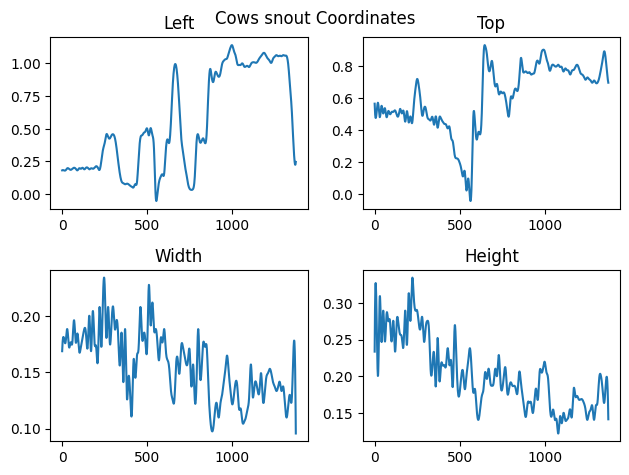

In [3]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_snout)) , X_snout[0])
plt.title("Left")
plt.subplot(2,2,2)
plt.plot(range(0,len(X_snout)) ,X_snout[1])
plt.title("Top")
plt.subplot(2,2,3)
plt.plot(range(0,len(X_snout)) ,X_snout[2])
plt.title("Width")
plt.subplot(2,2,4)
plt.plot(range(0,len(X_snout)) ,X_snout[3])
plt.title("Height")
plt.tight_layout()
plt.suptitle('Cows snout Coordinates')


# Train model

In [4]:
em_scores = list()
vi_scores = list()
em_models = list()
vi_models = list()
for n_components in range(2, 5): # test 2 to 5 n components 
    for idx in range(10): 
        em_model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        vi_model = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx, covariance_type='full', n_iter=50)
        em_model.fit(X_snout)
        vi_model.fit(X_snout)
        em_models.append(em_model)
        vi_models.append(vi_model)
        em_scores.append(em_model.score(X_snout))
        vi_scores.append(vi_model.score(X_snout))
        # print(f'Converged: {em_model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
em_model = em_models[np.argmax(em_scores)]
em_model = vi_models[np.argmax(vi_scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{em_model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
em_Z = em_model.predict(X_snout)
vi_Z = vi_model.predict(X_snout)

joblib.dump(em_model, 'models/EM/hmm_model_snout.pkl')
joblib.dump(vi_model, 'models/Vi/hmm_model_snout.pkl')

Model is not converging.  Current: 10242.605205920881 is not greater than 10242.634755905543. Delta is -0.029549984661571216
Model is not converging.  Current: 10238.395453394729 is not greater than 10238.419948488854. Delta is -0.024495094125086325
Model is not converging.  Current: 10065.798613150306 is not greater than 10065.809096338315. Delta is -0.010483188008947764


['models/Vi/hmm_model_snout.pkl']

In [5]:
print(em_model.means_)
print(vi_model.means_)
#print(em_model.covars_)

[[1.00985612 0.77615572 0.13083669 0.16525034]
 [0.20479123 0.51102357 0.17431822 0.25228154]
 [0.44962212 0.70182404 0.15669552 0.1876987 ]
 [0.33446456 0.21197878 0.18408009 0.19638035]]
[[0.3178546  0.24096975 0.18298217 0.19494164]
 [0.98300708 0.78489938 0.13155788 0.16782588]
 [0.31751184 0.24317924 0.18274378 0.19495481]
 [0.2398552  0.54909909 0.17148593 0.23725947]]


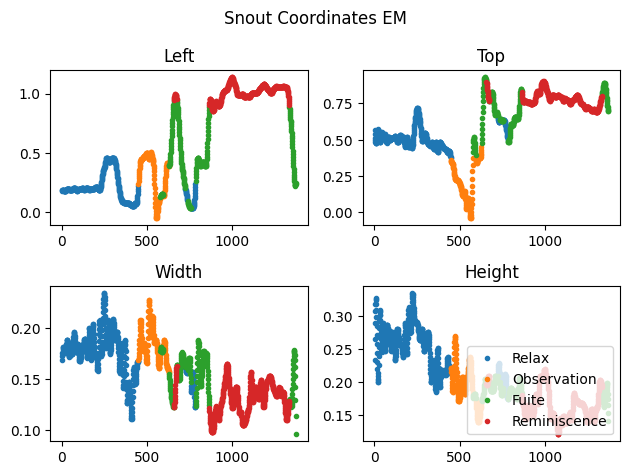

In [6]:
em_states= pd.unique(em_Z)
# print(em_Z)
state_names = ['Relax', 'Observation', 'Fuite', 'Reminiscence']

plt.subplot(2,2,1)
for i in em_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(em_Z == i)]
    y = X_snout[0][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in em_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(em_Z == i)]
    y = X_snout[1][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in em_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(em_Z == i)]
    y = X_snout[2][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in em_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(em_Z == i)]
    y = X_snout[3][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Height")
plt.suptitle('Snout Coordinates EM')

plt.tight_layout()
plt.legend(labels=state_names, loc="lower right", ncol=1)


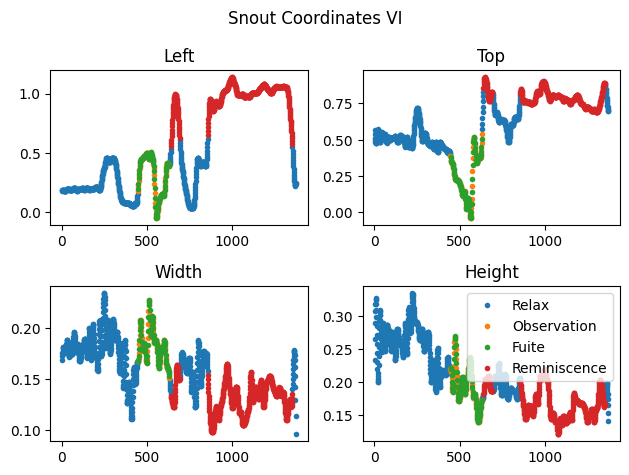

In [7]:
vi_states= pd.unique(vi_Z)


plt.subplot(2,2,1)
for i in vi_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(vi_Z == i)]
    y = X_snout[0][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in vi_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(vi_Z == i)]
    y = X_snout[1][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in vi_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(vi_Z == i)]
    y = X_snout[2][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in vi_states:
    x = np.linspace(1,len(X_snout),len(X_snout))[(vi_Z == i)]
    y = X_snout[3][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Height")
plt.suptitle('Snout Coordinates VI')

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)

In [9]:

state_dict = {
    0: 'Relax',
    1: 'Observation',
    2: 'Fuite',
    3: 'Reminiscence'
}
replaced_array = [state_dict[value] for value in em_Z]

df = pd.DataFrame({'states':replaced_array})
df.to_csv("../INF889E Project/Trained data/EM/snout_coords_hmmstates.csv")

state_dict = {
    0: 'Relax',
    1: 'Observation',
    2: 'Fuite',
    3: 'Reminiscence'
}
replaced_array = [state_dict[value] for value in vi_Z]

df = pd.DataFrame({'states':replaced_array})
df.to_csv("../INF889E Project/Trained data/VI/snout_coords_hmmstates.csv")